In [1]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

Загрузим исходное изображение и покажем его:

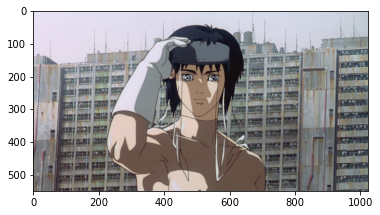

In [2]:
img = image.load_img("input_image.jpg")
plt.imshow(img)

Преобразуем исходное изображение в матрицу с разменостью (x, y, 3):

In [3]:
image_matrix = image.img_to_array(img)

Данная функция основана на функции дефрмации, только коэфициент масштабирования по оси X и Y одинаковый. Всё те же аффинные преобразования и последующая обрезка изображения

In [4]:
def scaling_image(mat, coefficient):
    height, width = mat.shape[:2]
    M_mat = np.float32([[coefficient, 0, 0], [0, coefficient, 0]])
    #данная строка масштабирует, но не обрезает изображение / this line scales but does not crop the image 
    scaled_mat = cv2.warpAffine(mat, M_mat, (width, height))

    #следующая строка масштабирует и обрезает изображение согласно масштабу
    #the next line scales and crops the image to scale: 

    #scaled_mat = cv2.warpAffine(mat, M_mat, (int(width*coefficient), int(height*coefficient)))
    return scaled_mat

Применим вышеописанную функцию:

In [5]:
output_img_matrix = scaling_image(image_matrix, 0.9)

Преобразуем полученную матрицу в изображение и покажем её:

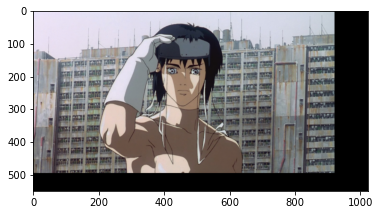

In [6]:
output_image = image.array_to_img(output_img_matrix)
plt.imshow(output_image)

Сохраним полученное изображение:

In [ ]:
output_image.save("rotation_augmentation_output.jpg")